# Building Basic predictive models over the NYC Taxi Trip Dataset

Targets: Choosing most suitable evaluation metrics. Benchmark model. K-Nearest Neighbours model. Linear model, interpret the variable coefficients of the model. Decision Tree model, interpret the variable importance. Plot Bar plots.

In [1]:
#Importing Required libraries.

import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data with pandas and giving vaiable name tt
tt = pd.read_csv('nyc_taxi_trip_duration.csv')
tt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
tt.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [4]:
#Checking missing values. 
np.sum(pd.isnull(tt))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
tt['trip_duration_hour'] = tt['trip_duration'].apply(lambda x: x/3600)

In [6]:
tt.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
trip_duration_hour    float64
dtype: object

# KNN Model

In [7]:
#seperate features and target
features = tt.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = tt["trip_duration_hour"]

In [8]:
tt.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
trip_duration_hour    float64
dtype: object

In [9]:
#Clean the data set
tt["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [10]:
df = pd.concat([tt, pd.get_dummies(tt[['passenger_count']].astype('str'))], axis=1)
try:
    df.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,-73.953918,40.778873,-73.963875,40.771164,400,0,1,0,0,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,1100,0,0,1,0,0,0,0,0,0
2,-73.997314,40.721458,-73.948029,40.774918,1635,0,0,1,0,0,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,1141,0,0,0,0,0,0,1,0,0
4,-74.017120,40.708469,-73.988182,40.740631,848,0,1,0,0,0,0,0,0,0


In [11]:
x = df
y = tt["trip_duration_hour"]
x.shape, y.shape

((729322, 14), (729322,))

In [12]:
#scaling the data with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,0.856226,0.353352,0.856048,0.731696,0.000206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.855612,0.350606,0.855497,0.725202,0.000567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.855451,0.350007,0.856331,0.732015,0.000842,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.856087,0.352236,0.856174,0.732502,0.000588,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.855098,0.349251,0.855614,0.729095,0.000437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#import the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [15]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [16]:
#creating instance of KNN
re = KNN(n_neighbors = 10)

#fitting the model
re.fit(train_x,train_y)

#predicting over the train set and calculating F1
test_predict = re.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.047476476959789245


# Find the value of K

In [17]:
def elbow(k):
    #initiating empty list
    test_rmse=[]
    
    #training model for evey value of K
    for i in k:
        #Instance of KNN
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse   

Text(0.5, 1.0, 'Elbow for the Curve')

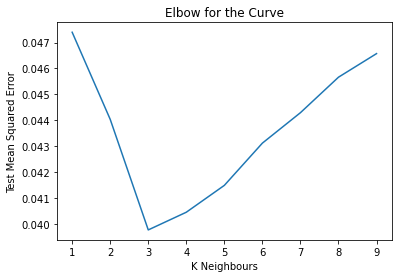

In [18]:
k = range(1,10)
test = elbow(k)
#Plotting the Curves
plt.plot(k,test)
plt.xlabel("K Neighbours")
plt.ylabel("Test Mean Squared Error")
plt.title("Elbow for the Curve")

In [19]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating mse
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.0414927076769233


In [24]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score

0.7589457835569253

In [25]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score

0.9976648945419085